In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from calendar import month_name

In [2]:
cust = pd.read_csv("F:\Analytix Lab\My classes\Stats\Case_Study\Python_Ecommerce\CUSTOMERS.csv")
cust

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [3]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
location = pd.read_csv("F:\Analytix Lab\My classes\Stats\Case_Study\Python_Ecommerce\GEO_LOCATION.csv")
location

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh
...,...,...,...,...,...
19010,99955,-28.107588,-52.144019,Ghaziabad,Uttar Pradesh
19011,99970,-28.345143,-51.876926,Vadugapatti,Tamil Nadu
19012,99910,-27.863500,-52.084760,Akkarampalle,Andhra Pradesh
19013,99920,-27.858716,-52.300403,Kolkata,West Bengal


In [5]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [6]:
ord_items = pd.read_csv("F:\Analytix Lab\My classes\Stats\Case_Study\Python_Ecommerce\ORDER_ITEMS.csv")
ord_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [7]:
ord_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
# Converting Shipping_date variable to datetime format from object type

ord_items.shipping_limit_date = pd.to_datetime(ord_items.shipping_limit_date, format = "%m/%d/%Y %H:%M")
ord_items.shipping_limit_date

0        2017-09-19 09:45:00
1        2017-05-03 11:05:00
2        2018-01-18 14:48:00
3        2018-08-15 10:10:00
4        2017-02-13 13:57:00
                 ...        
112645   2018-05-02 04:11:00
112646   2018-07-20 04:31:00
112647   2017-10-30 17:14:00
112648   2017-08-21 00:04:00
112649   2018-06-12 17:10:00
Name: shipping_limit_date, Length: 112650, dtype: datetime64[ns]

In [9]:
#Renaming Order_item_id column to Quantity
ord_items.rename(columns={'order_item_id':'Quantity'}, inplace=True)

In [10]:
# Removing Duplicate records from Order_Items table
ord_items = ord_items.drop_duplicates(subset=['order_id','product_id', 'seller_id', 'shipping_limit_date'], keep='last',ignore_index = True)
ord_items

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14
...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41
102421,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53
102422,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95
102423,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72


In [11]:
# Adding Total Cost variable in Order_Items table
ord_items.loc[:,'tot_cost'] = ((ord_items.Quantity * ord_items.price) + ord_items.freight_value)
ord_items

C:\Users\dell\AppData\Local\Temp\ipykernel_3076\2416229471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ord_items.loc[:,'tot_cost'] = ((ord_items.Quantity * ord_items.price) + ord_items.freight_value)


,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04
...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41,343.40
102421,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53,386.53
102422,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95,116.85
102423,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72,64.71


In [12]:
ord_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             102425 non-null  object        
 1   Quantity             102425 non-null  int64         
 2   product_id           102425 non-null  object        
 3   seller_id            102425 non-null  object        
 4   shipping_limit_date  102425 non-null  datetime64[ns]
 5   price                102425 non-null  float64       
 6   freight_value        102425 non-null  float64       
 7   tot_cost             102425 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 6.3+ MB


In [13]:
ord_payment = pd.read_csv("F:\Analytix Lab\My classes\Stats\Case_Study\Python_Ecommerce\ORDER_PAYMENTS.csv")
ord_payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [14]:
ord_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [15]:
ord_rev = pd.read_csv("F:\Analytix Lab\My classes\Stats\Case_Study\Python_Ecommerce\ORDER_REVIEW_RATINGS.csv")
ord_rev

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,12/9/2017 0:00,12/11/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,3/22/2018 0:00,3/23/2018 9:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,7/1/2018 0:00,7/2/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,12/15/2017 0:00,12/16/2017 1:29


In [16]:
ord_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [17]:
# Converting Review_creation_date and review_answer_timestamp  variable to datetime format from object type
ord_rev.review_creation_date = pd.to_datetime(ord_rev.review_creation_date, format = "%m/%d/%Y %H:%M")
ord_rev.review_answer_timestamp = pd.to_datetime(ord_rev.review_answer_timestamp, format = "%m/%d/%Y %H:%M")

In [18]:
ord_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_creation_date     100000 non-null  datetime64[ns]
 4   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


In [19]:
orders = pd.read_csv("F:\Analytix Lab\My classes\Stats\Case_Study\Python_Ecommerce\ORDERS.csv")
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00


In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Converting necessary date type  variable to datetime format from object type

In [21]:
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp, format= "%m/%d/%Y %H:%M")
orders.order_approved_at = pd.to_datetime(orders.order_approved_at, format= "%m/%d/%Y %H:%M")
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date, format= "%m/%d/%Y %H:%M")
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date, format= "%m/%d/%Y %H:%M")
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date, format= "%m/%d/%Y %H:%M")

In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [23]:
products = pd.read_csv("F:\Analytix Lab\My classes\Stats\Case_Study\Python_Ecommerce\PRODUCTS.csv")
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [24]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [25]:
seller = pd.read_csv("F:\Analytix Lab\My classes\Stats\Case_Study\Python_Ecommerce\SELLERS.csv")
seller

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Kalan Wali,Haryana
3091,f8201cab383e484733266d1906e2fdfa,88137,Bopal,Gujarat
3092,74871d19219c7d518d0090283e03c137,4650,Akkarampalle,Andhra Pradesh
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Ekambara kuppam,Andhra Pradesh


In [26]:
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [27]:
# Combining Table Orders and Order_Items
ord_items_orders = pd.merge(left= ord_items, right= orders, how='left', on = 'order_id' )
ord_items_orders

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:00,2018-04-25 04:11:00,2018-04-25 12:09:00,2018-05-10 22:56:00,2018-05-18
102421,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:00,2018-07-17 04:31:00,2018-07-17 08:05:00,2018-07-23 20:31:00,2018-08-01
102422,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:00,2017-10-24 17:14:00,2017-10-26 15:13:00,2017-10-28 12:22:00,2017-11-10
102423,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:00,2017-08-15 00:04:00,2017-08-15 19:02:00,2017-08-16 21:59:00,2017-08-25


In [28]:
# Calculating Total Revenue considering for all the orders except where Order Status is cancelled
Total_Revenue = round(ord_items_orders.loc[ord_items_orders.order_status != 'canceled', 'tot_cost'].sum(),2)

In [29]:
Total_Revenue

15964381.03

### Q1. a) Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…) 

In [30]:
print( "Total Revenue: ", Total_Revenue)
print("Total Quantity: ", ord_items.Quantity.sum())
print("Total Products: ", products.product_id.nunique() )
print("Total Customers: ",cust.customer_unique_id.nunique()) 
print("Total Product Categories: ", products.product_category_name.nunique())
print("Total Seller: ", seller.seller_id.nunique())
print("Total Location/Cities: ",location.geolocation_zip_code_prefix.nunique())
print("Total Payment mode: ",ord_payment.payment_type.nunique()) 

Total Revenue:  15964381.03
Total Quantity:  117844
Total Products:  32951
Total Customers:  96096
Total Product Categories:  71
Total Seller:  3095
Total Location/Cities:  19015
Total Payment mode:  5


#### Q1.b) Understanding how many new customers acquired every month


In [31]:
# Adding one column having details in format = Month_Number - Year_Number
orders['order_purchase_month']  =  orders.order_purchase_timestamp.dt.strftime("%Y-%m")
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01


In [32]:
# Combining Customer table and Orders Table
orders_cust = pd.merge(left= orders, right= cust, how = 'left', on = 'customer_id')
orders_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh


In [33]:
cust_month = orders_cust[['customer_unique_id','order_purchase_month']]
cust_month.head()

,customer_unique_id,order_purchase_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,af07308b275d755c9edb36a90c618231,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02


In [34]:
cust_month_new = cust_month.drop_duplicates(subset='customer_unique_id', keep='first')
cust_month_new.head()

,customer_unique_id,order_purchase_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,af07308b275d755c9edb36a90c618231,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02


In [35]:
#Summary Table of New Customer
cust_month_new_summ = cust_month_new.groupby('order_purchase_month')[['customer_unique_id']].count().reset_index()
cust_month_new_summ.rename(columns={'order_purchase_month':'Year_Month','customer_unique_id':'Count'}, inplace=True)
cust_month_new_summ.head()

,Year_Month,Count
0,2016-09,4
1,2016-10,315
2,2016-12,1
3,2017-01,742
4,2017-02,1729


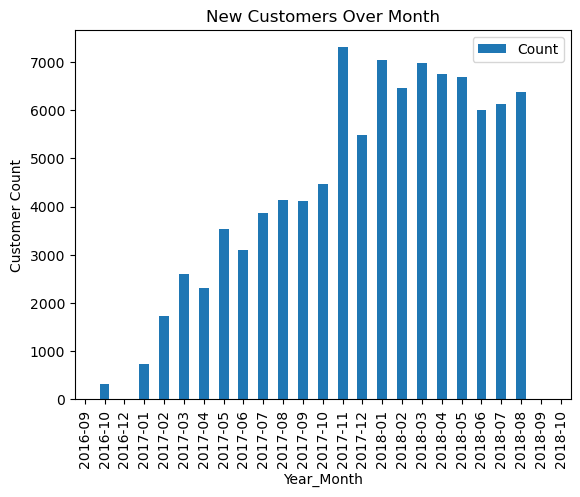

In [36]:
cust_month_new_summ.plot.bar(x = 'Year_Month', y = 'Count' ,title = 'New Customers Over Month')
plt.ylabel('Customer Count')
plt.show()

#### c. Understand the retention of customers on month on month basis

In [37]:
print(cust_month.shape[0])
print(cust_month_new.shape[0])

99441
96096


In [38]:
#Getting the details of Retention Customer
cust_month_retention = cust_month[~cust_month.isin(cust_month_new).all(axis = 1)]
cust_month_retention

,customer_unique_id,order_purchase_month
2374,7e30d2336a1f1182766cf6fb863d5554,2018-05
2829,c5400d2fca348bd1313426efe4b10a51,2018-04
3660,8d50f5eadf50201ccdcedfb9e2ac8455,2018-05
4058,a7f45c1961dbd98e7a14f3d38ea11c06,2018-07
4070,7a380cb5434e6b6b5b37d45bb99dbe8a,2018-05
...,...,...
99307,62b8761192c86f4ead06f4a433096a2b,2018-05
99344,dca9a13536adcef18c6c5859487347b1,2018-03
99347,d05c44a138277ad325d915c6b7ccbcdf,2018-09
99419,39fff7cb5873a7116b02234bd1e6c6dc,2017-10


In [39]:
cust_month_retention_summ = cust_month_retention.groupby('order_purchase_month')[['customer_unique_id']].count().reset_index()
cust_month_retention_summ.rename(columns={'order_purchase_month':'Year_Month','customer_unique_id':'Count'}, inplace=True)
cust_month_retention_summ.head()


,Year_Month,Count
0,2016-10,9
1,2017-01,58
2,2017-02,51
3,2017-03,83
4,2017-04,90


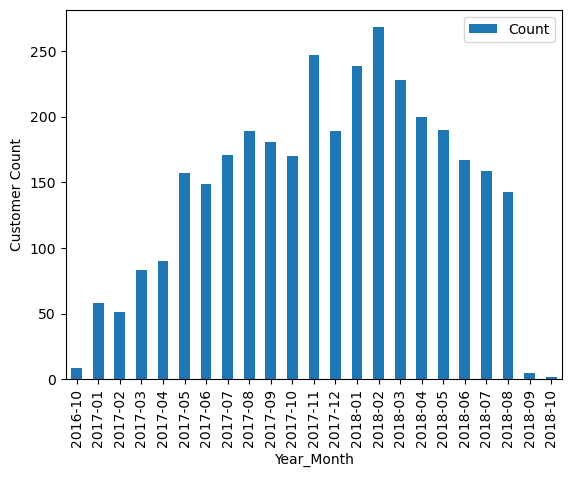

In [40]:
# Plotting Retention Customer Count Month wise
cust_month_retention_summ.plot.bar(x = 'Year_Month', y = 'Count')
plt.ylabel('Customer Count')
plt.show()

#### d. How the revenues from existing/new customers on month on month basis

In [41]:
ord_items_orders_rev = pd.merge(ord_items, orders, how = 'left', on = 'order_id')
ord_items_orders_rev = ord_items_orders_rev.loc[ord_items_orders_rev.order_status != 'canceled']
ord_items_orders_rev_summ = ord_items_orders_rev.groupby('order_purchase_month')['tot_cost'].sum().reset_index()
ord_items_orders_rev_summ.rename(columns={'order_purchase_month':'Year_Month'}, inplace=True)
ord_items_orders_rev_summ.head()

,Year_Month,tot_cost
0,2016-09,306.93
1,2016-10,54512.79
2,2016-12,19.62
3,2017-01,138596.04
4,2017-02,286066.79


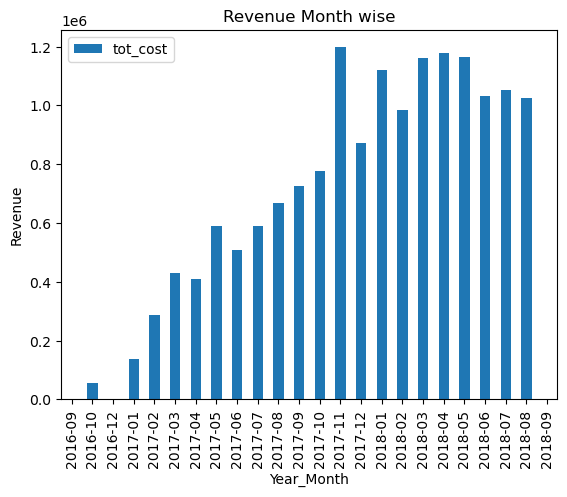

In [42]:
# Plotting Month wise Revenue 
ord_items_orders_rev_summ.plot.bar(x = 'Year_Month', y = 'tot_cost', title = 'Revenue Month wise' )
plt.ylabel('Revenue')
plt.show()


#### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [43]:
# Adding Month column in ord_items_orders_rev table
ord_items_orders_rev['Month'] = ord_items_orders_rev.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x, format = '%b'))
ord_items_orders_rev.head()

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month,Month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,2017-09,Sep
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,2017-04,Apr
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,2018-01,Jan
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,2018-08,Aug
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,2017-02,Feb


In [44]:
ord_items_orders_rev_prod = pd.merge(ord_items_orders_rev, products, how='left', on = 'product_id')
ord_items_orders_rev_prod.head()

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,customer_id,order_status,...,order_purchase_month,Month,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,...,2017-09,Sep,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,2017-04,Apr,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,2018-01,Jan,Furniture_Decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,2018-08,Aug,Perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,2017-02,Feb,Garden_Tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [45]:
# Product Category wise Summary
ord_items_orders_rev_prod.groupby('product_category_name')[['Quantity','tot_cost']].sum().reset_index().rename(columns = 
                            {'product_category_name':'Product_Category','tot_cost':'Sales'})

,Product_Category,Quantity,Sales
0,Agro_Industry_And_Commerce,216,78384.51
1,Air_Conditioning,297,60699.19
2,Art,212,28479.56
3,Arts_And_Craftmanship,26,2246.03
4,Audio,367,56546.14
...,...,...,...
66,Stationery,2604,280867.78
67,Tablets_Printing_Image,85,8895.90
68,Telephony,4648,392813.67
69,Toys,4235,567639.67


In [46]:
# Monthly Sales Trend
ord_items_orders_rev_prod.groupby('Month')[['Quantity','tot_cost']].sum().reset_index().rename(columns = 
                            {'tot_cost':'Sales'})

,Month,Quantity,Sales
0,Apr,11126,1585392.86
1,Aug,12742,1694780.88
2,Dec,6570,871471.71
3,Feb,9848,1270619.97
4,Jan,9566,1260118.58
5,Jul,12086,1642088.02
6,Jun,11096,1541413.32
7,Mar,11592,1589561.30
8,May,12539,1754513.96
9,Nov,9108,1196907.87


In [47]:
#Adding Week Number in Table
ord_items_orders_rev_prod['Week_Num'] = ord_items_orders_rev_prod['order_purchase_timestamp'].dt.isocalendar().week
ord_items_orders_rev_prod.head()

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,customer_id,order_status,...,Month,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Week_Num
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,...,Sep,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,37
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,Apr,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,17
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,Jan,Furniture_Decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,2
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,Aug,Perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,32
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,Feb,Garden_Tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,5


In [48]:
# Weekly Sales Trend
ord_items_orders_rev_prod.groupby('Week_Num')[['Quantity','tot_cost']].sum().reset_index().rename(columns = 
                            {'tot_cost':'Sales'})

,Week_Num,Quantity,Sales
0,1,1688,221846.66
1,2,2171,295102.63
2,3,2281,291527.90
3,4,2334,317182.60
4,5,2443,316480.08
5,6,2400,327766.74
6,7,2395,291003.68
7,8,2492,301465.76
8,9,2776,382958.78
9,10,2598,358046.72


In [49]:
ord_items_orders_rev_cust = pd.merge(ord_items_orders_rev, cust, how = 'left', on = 'customer_id') 
ord_items_orders_rev_cust.head()

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,customer_id,order_status,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month,Month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,...,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,2017-09,Sep,871766c5855e863f6eccc05f988b23cb,28013,Guntakal,Andhra Pradesh
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,2017-04,Apr,eb28e67c4c0b83846050ddfb8a35d051,15775,Kirandul,Chhattisgarh
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,2018-01,Jan,3818d81c6709e39d06b2738a8d3a2474,35661,Kanker,Chhattisgarh
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,2018-08,Aug,af861d436cfc08b2c2ddefd0ba074622,12952,Patancheru,Andhra Pradesh
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,2017-02,Feb,64b576fb70d441e8f1b2d7d446e483c5,13226,Changanassery,Kerala


In [50]:
# Location wise Sales
ord_items_orders_rev_cust.groupby('customer_zip_code_prefix')[['Quantity','tot_cost']].sum().reset_index().rename(columns = 
                            {'customer_zip_code_prefix':'Location',   'tot_cost':'Sales'}).head(10)

,Location,Quantity,Sales
0,1003,1,98.97
1,1004,2,198.11
2,1005,6,570.72
3,1006,2,868.05
4,1007,4,505.55
5,1008,4,542.98
6,1009,8,1293.54
7,1011,7,326.08
8,1012,2,667.11
9,1013,3,295.98


#### f. Popular Products by month, seller, state, category.


In [51]:
# Most Popular Products by Category
ord_items_orders_rev_prod.groupby(['product_category_name','product_id'])['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False).drop_duplicates(subset = 'product_category_name', keep = 'first')

,product_category_name,product_id,Quantity
14065,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,529
4969,Bed_Bath_Table,99a4788cb24856965c36a24e339b6058,518
15291,Garden_Tools,422879e10f46682990de24d770e7f83d,511
7951,Computers_Accessories,d1c427060a0f73f6b889a5c7c61f2ac4,346
31249,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08,328
...,...,...,...
11862,Fashion_Sport,e8f7d2639ff8caa8b86e5973295898b7,5
22005,Music,4befae07dba4384f6d8237ad1e7f8294,4
11580,Fashion_Childrens_Clothes,57bdf3098169cccdb62221bd3e089cbd,3
21536,La_Cuisine,33900d427fa4bd3f509cdacda72e84a3,3


In [52]:
# Most Popular Products by State
ord_items_orders_rev_cust.groupby(['customer_state','product_id'])['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False).drop_duplicates(subset = 'customer_state', keep = 'first')

,customer_state,product_id,Quantity
16236,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,347
34081,Gujarat,53759a2ecddad2bb87a079a1f1519f73,52
26327,Chhattisgarh,422879e10f46682990de24d770e7f83d,41
42272,Karnataka,422879e10f46682990de24d770e7f83d,24
30605,Delhi,53759a2ecddad2bb87a079a1f1519f73,22
46343,Madhya Pradesh,389d119b48cf3043d311335e499d9c6b,18
49193,Maharashtra,99a4788cb24856965c36a24e339b6058,15
40876,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
45402,Kerala,aca2eb7d00ea1a7b8ebd4e68314663af,13
37931,Haryana,2b4609f8948be18874494203496bc318,13


In [53]:
# Most Popular Product by Seller
ord_items_orders_rev_cust.groupby(['seller_id','product_id'])[['Quantity']].sum().reset_index().sort_values(by = 'Quantity', ascending = False).drop_duplicates(subset = 'seller_id', keep = 'first')

,seller_id,product_id,Quantity
20896,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,529
9825,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,512
4630,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,511
22074,a1043bafd471dff536d0c462352beb48,d1c427060a0f73f6b889a5c7c61f2ac4,346
26592,cc419e0650a3c5ba77189a1882b7556a,154e7e31ebfa092203795c972e5804a6,283
...,...,...,...
15306,712efd3b68f9686dc856b84abd0f21ae,4466f429e81266e99d1935267aa13329,1
15318,713e3a23ca5e47786eb6f0d99f94cfac,0367635ea4efa4eb15a29f1e05887851,1
15185,70ee69419916dc13e3aed619061f996c,dedb5adefe63796ce6edd624d0ebd8a8,1
14930,702835e4b785b67a084280efca355756,a9c404971d1a5b1cbc2e4070e02731fd,1


In [54]:
# Most Popular Product by Month
ord_items_orders_rev_cust.groupby(['Month','product_id'])[['Quantity']].sum().reset_index().sort_values(by = 'Quantity', ascending = False).drop_duplicates(subset = 'Month', keep = 'first')

,Month,product_id,Quantity
24140,Jan,aca2eb7d00ea1a7b8ebd4e68314663af,122
45812,May,53b36df67ebb7c41585e8d54d6772e08,114
50902,Nov,389d119b48cf3043d311335e499d9c6b,98
1879,Apr,53b36df67ebb7c41585e8d54d6772e08,87
35690,Jun,99a4788cb24856965c36a24e339b6058,79
20506,Feb,e53e557d5a159f5aa2c5e995dfdf244b,78
29545,Jul,99a4788cb24856965c36a24e339b6058,74
12107,Aug,e7cc48a9daff5436f63d3aad9426f28b,68
41850,Mar,aca2eb7d00ea1a7b8ebd4e68314663af,65
13639,Dec,422879e10f46682990de24d770e7f83d,53


#### g. Popular categories by state, month

In [55]:
# Most Popular Category by Month
ord_items_orders_rev_prod.groupby(['Month','product_category_name'])[['Quantity']].sum().reset_index().sort_values(by = 'Quantity', ascending = False) \
                        .drop_duplicates(subset = 'Month', keep = 'first')

,Month,product_category_name,Quantity
339,Jul,Bed_Bath_Table,1333
76,Aug,Bed_Bath_Table,1291
407,Jun,Bed_Bath_Table,1270
541,May,Bed_Bath_Table,1215
473,Mar,Bed_Bath_Table,1196
213,Feb,Computers_Accessories,1141
7,Apr,Bed_Bath_Table,1140
608,Nov,Bed_Bath_Table,1094
270,Jan,Bed_Bath_Table,1021
673,Oct,Bed_Bath_Table,667


In [56]:
# Most Popular Category by State
ord_items_orders_rev_cust_prod = pd.merge(ord_items_orders_rev_cust, products, how = 'left', on = 'product_id')
ord_items_orders_rev_cust_prod.groupby(['customer_state','product_category_name'])[['Quantity']].sum().reset_index().sort_values(by = 'Quantity', ascending = False) \
                        .drop_duplicates(subset = 'customer_state', keep = 'first')

,customer_state,product_category_name,Quantity
7,Andhra Pradesh,Bed_Bath_Table,7896
272,Gujarat,Bed_Bath_Table,869
132,Chhattisgarh,Bed_Bath_Table,729
505,Karnataka,Bed_Bath_Table,420
625,Madhya Pradesh,Bed_Bath_Table,363
229,Delhi,Health_Beauty,336
339,Haryana,Bed_Bath_Table,315
691,Maharashtra,Bed_Bath_Table,240
901,Tamil Nadu,Bed_Bath_Table,233
448,Jammu & Kashmir,Bed_Bath_Table,193


#### h. List top 10 most expensive products sorted by price


In [57]:
# Price calculated as average of price for each product
ord_items.groupby('product_id')['price'].mean().reset_index().sort_values(by = 'price', ascending = False,ignore_index = True ).head(10)

,product_id,price
0,489ae2aa008f021502940f251d4cce7f,6735.00
1,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
2,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
3,a6492cc69376c469ab6f61d8f44de961,4799.00
4,c3ed642d592594bb648ff4a04cee2747,4690.00
5,259037a6a41845e455183f89c5035f18,4590.00
6,a1beef8f3992dbd4cd8726796aa69c53,4399.87
7,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
8,6902c1962dd19d540807d0ab8fade5c6,3999.90
9,4ca7b91a31637bd24fb8e559d5e015e4,3999.00


#### 2. Performing Customers/sellers Segmentation
#### a. Divide the customers into groups based on the revenue generated 

In [58]:
# Making Decile Group for Customer
Cust_Group = ord_items_orders_rev_cust.groupby('customer_id')['tot_cost'].sum().reset_index().rename(columns = {'customer_id':'Cust_ID','tot_cost':'Revenue'})
Cust_Group

,Cust_ID,Revenue
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
98200,fffcb937e9dd47a13f05ecb8290f4d3e,91.91
98201,fffecc9f79fd8c764f843e9951b11341,81.36
98202,fffeda5b6d849fbd39689bb92087f431,63.13
98203,ffff42319e9b2d713724ae527742af25,214.13


In [59]:
Cust_Group['Decile_Grp'] = pd.cut(Cust_Group.Revenue,bins = 10, labels=np.arange(1,11))
Cust_Group

,Cust_ID,Revenue,Decile_Grp
0,00012a2ce6f8dcda20d059ce98491703,114.74,1
1,000161a058600d5901f007fab4c27140,67.41,1
2,0001fd6190edaaf884bcaf3d49edf079,195.42,1
3,0002414f95344307404f0ace7a26f1d5,179.35,1
4,000379cdec625522490c315e70c7a9fb,107.01,1
...,...,...,...
98200,fffcb937e9dd47a13f05ecb8290f4d3e,91.91,1
98201,fffecc9f79fd8c764f843e9951b11341,81.36,1
98202,fffeda5b6d849fbd39689bb92087f431,63.13,1
98203,ffff42319e9b2d713724ae527742af25,214.13,1


In [60]:
# Making Decile Group for Seller
Seller_Grp = ord_items_orders_rev_cust.groupby('seller_id')['tot_cost'].sum().reset_index().rename(columns = {'seller_id':'Seller_ID','tot_cost':'Revenue'})
Seller_Grp['Decile_Grp'] = pd.cut(Seller_Grp.Revenue,bins = 10, labels=np.arange(1,11))
Seller_Grp

,Seller_ID,Revenue,Decile_Grp
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06,1
1,001cca7ae9ae17fb1caed9dfb1094831,32871.94,2
2,002100f778ceb8431b7a1020ff7ab48f,2111.66,1
3,003554e2dce176b5555353e4f3555ac8,139.38,1
4,004c9cd9d87a3c30c522c48c4fc07416,24060.81,1
...,...,...,...
3051,ffc470761de7d0232558ba5e786e57b7,2136.99,1
3052,ffdd9f82b9a447f6f8d4b91554cc7dd3,2716.83,1
3053,ffeee66ac5d5a62fe688b9d26f83f534,2259.55,1
3054,fffd5413c0700ac820c7069d66d98c89,11983.55,1


#### 3. Cross-Selling (Which products are selling together)


In [78]:
#cross_sell = ord_items_orders[ord_items_orders['order_id'].duplicated(keep= False)]
cross_sell['Grouped'] = cross_sell.groupby('order_id')['product_id'].transform(lambda x: ','.join(x))

cross_sell_final = cross_sell[['order_id','Grouped']].drop_duplicates(ignore_index=True)

cross_sell_final


C:\Users\dell\AppData\Local\Temp\ipykernel_3076\2367348220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_sell['Grouped'] = cross_sell.groupby('order_id')['product_id'].transform(lambda x: ','.join(x))


,order_id,Grouped
0,002f98c0f7efd42638ed6100ca699b42,"d41dc2f2979f52d75d78714b378d4068,880be32f4db1d..."
1,00337fe25a3780b3424d9ad7c5a4b35e,"1f9799a175f50c9fa725984775cac5c5,13944d17b2574..."
2,005d9a5423d47281ac463a968b3936fb,"fb7a100ec8c7b34f60cec22b1a9a10e0,4c3ae5db49258..."
3,00946f674d880be1f188abc10ad7cf46,"4dcb49b9ca7e48d2f108d40caa77caa2,9bb2d066e4b33..."
4,0097f0545a302aafa32782f1734ff71c,"b6397895a17ce86decd60b898b459796,636598095d69a..."
...,...,...
3231,ffb18bf111fa70edf316eb0390427986,"e86b81dcac341ea01df0260077cdf082,599dc392f7a23..."
3232,ffb8f7de8940249a3221252818937ecb,"bd6e8cf9fe4122c385da2bcb9f979d5d,803f77475e1b5..."
3233,ffb9a9cd00c74c11c24aa30b3d78e03b,"fec565c4e3ad965c73fb1a21bb809257,03bb06cda4071..."
3234,ffc16cecff8dc037f60458f28d1c1ba5,"241e398aacc909372622952b2ec6f954,7c1043bb5837d..."


In [82]:
from collections import Counter
from itertools import combinations

counter = Counter()
for row in cross_sell_final['Grouped']:
    row_list = row.split(',')
    counter.update(combinations(row_list,2))
print(counter)

Counter({('e53e557d5a159f5aa2c5e995dfdf244b', '36f60d45225e60c7da4558b070ce4b60'): 22, ('35afc973633aaeb6b877ff57b2793310', '99a4788cb24856965c36a24e339b6058'): 15, ('99a4788cb24856965c36a24e339b6058', '35afc973633aaeb6b877ff57b2793310'): 14, ('36f60d45225e60c7da4558b070ce4b60', 'e53e557d5a159f5aa2c5e995dfdf244b'): 12, ('f4f67ccaece962d013a4e1d7dc3a61f7', '4fcb3d9a5f4871e8362dfedbdb02b064'): 11, ('3f14d740544f37ece8a9e7bc8349797e', '36f60d45225e60c7da4558b070ce4b60'): 8, ('4fcb3d9a5f4871e8362dfedbdb02b064', 'f4f67ccaece962d013a4e1d7dc3a61f7'): 6, ('422879e10f46682990de24d770e7f83d', '389d119b48cf3043d311335e499d9c6b'): 6, ('53759a2ecddad2bb87a079a1f1519f73', '389d119b48cf3043d311335e499d9c6b'): 5, ('389d119b48cf3043d311335e499d9c6b', '422879e10f46682990de24d770e7f83d'): 5, ('e5ae72c62ebfa708624f5029d609b160', '5b8a5a9417210b1b84b67b9a7aefb935'): 5, ('18486698933fbb64af6c0a255f7dd64c', 'dbb67791e405873b259e4656bf971246'): 5, ('0bcc3eeca39e1064258aa1e932269894', '422879e10f46682990de24d7

#### 4.a)  How customers are paying?

In [62]:
ord_payment.drop_duplicates(subset='payment_type', keep='first', ignore_index=True)['payment_type'].reset_index().drop(columns = 'index')

,payment_type
0,credit_card
1,UPI
2,voucher
3,debit_card
4,not_defined


#### 4.b) Which payment channels are used by most customers?

<AxesSubplot:title={'center':'Payment Proportion'}, ylabel='payment_type'>

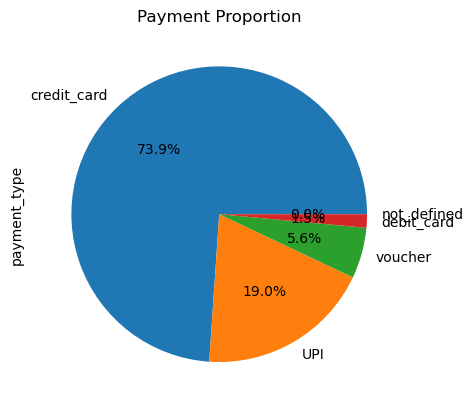

In [63]:
ord_payment.payment_type.value_counts().plot.pie(autopct='%1.1f%%', title = 'Payment Proportion')

#### 5. Customer satisfaction towards category & product

#### a. Which categories (top 10) are maximum rated & minimum rated?


In [64]:
ord_items_prod = pd.merge(ord_items, products, how = 'left', on = 'product_id')
ord_rev_cat = pd.merge( ord_rev, ord_items_prod, how = 'left', on = 'order_id')

In [65]:
cat_rev_summ = ord_rev_cat.groupby('product_category_name')['review_score'].mean().reset_index()
print("Product Categories with Minimum Avg Rating")
cat_rev_summ.sort_values(by = 'review_score').head(10)

Product Categories with Minimum Avg Rating


,product_category_name,review_score
61,Security_And_Services,2.500000
57,Office_Furniture,3.587156
30,Fashion_Male_Clothing,3.617886
46,Home_Comfort_2,3.708333
27,Fashio_Female_Clothing,3.714286
23,Diapers_And_Hygiene,3.740741
4,Audio,3.811966
41,Furniture_Mattress_And_Upholstery,3.815789
19,Construction_Tools_Safety,3.846154
47,Home_Confort,3.848411


In [66]:
print("Product Categories with Maximum Avg Rating")
cat_rev_summ.sort_values(by = 'review_score', ascending=False).head(10)

Product Categories with Maximum Avg Rating


,product_category_name,review_score
11,Cds_Dvds_Musicals,4.666667
29,Fashion_Childrens_Clothes,4.500000
8,Books_General_Interest,4.439623
9,Books_Imported,4.389831
37,Food_Drink,4.381356
22,Costruction_Tools_Tools,4.371134
10,Books_Technical,4.345865
53,Luggage_Accessories,4.327307
64,Small_Appliances_Home_Oven_And_Coffee,4.302632
32,Fashion_Sport,4.285714


#### b. Which products (top10) are maximum rated & minimum rated?

In [67]:
print("Minimum Rated 10 Products")
ord_rev_cat.groupby('product_id')['review_score'].mean().reset_index().sort_values(by = 'review_score').head(10)

Minimum Rated 10 Products


,product_id,review_score
11572,592cc6634d2c783d297effc0b828bc37,1.0
16391,7e99ab6d9d5d63b0190513103bdc1188,1.0
16392,7e9b52ab8c9b4c0fa93e431e8c3975e4,1.0
24109,bb72e3bc2b09ab0edf7fc724639afafd,1.0
7124,36eabbbffe429d2997d5bf9b40695335,1.0
7121,36e89a9ec56f96288ea7fbb266132288,1.0
29952,e8bb3d53d12c06cae6287143be1ce7ec,1.0
31900,f7d5edd55cc83003c9ff58de184833d5,1.0
16405,7eb9c68704af5effea1cee6f3a6b4b4b,1.0
7111,36d2ea35ee407975d70fcef78e16e3a8,1.0


In [68]:
print("Maximum Rated 10 Products")
ord_rev_cat.groupby('product_id')['review_score'].mean().reset_index().sort_values(by = 'review_score', ascending = False).head(10)

Maximum Rated 10 Products


,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
17330,86743ff92eee3d16b7df59cddd583b8c,5.0
17345,868ceb027ab706a4dee42e2220006b85,5.0
17343,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
17342,868766ed2172644fdd977d6bd395a107,5.0
17340,8684bd8f93b4f4038d07188a23811e93,5.0
17335,867c96d2bb67aba6500a4c509cf76072,5.0
17334,867b820367ec206b38a357f2c12454b7,5.0
17333,867901d7e8488fb97f1fb538c09d476e,5.0
17325,865bfa00c1dad8f4146d3c2765f051ca,5.0


#### c. Average rating by location, seller, product, category, month etc.

In [69]:
# Average Rating by Product
ord_rev_cat.groupby('product_id')['review_score'].mean().reset_index()

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,4.5
32947,fff81cc3158d2725c0655ab9ba0f712c,4.0
32948,fff9553ac224cec9d15d49f5a263411f,5.0
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0


In [70]:
# Average Rating by Month
ord_rev_cat['Month'] = ord_rev_cat.review_creation_date.dt.strftime( "%b")
ord_rev_cat.groupby('Month')['review_score'].mean().reset_index()

,Month,review_score
0,Apr,3.900952
1,Aug,4.175617
2,Dec,3.868901
3,Feb,4.017187
4,Jan,4.022565
5,Jul,4.204557
6,Jun,4.139799
7,Mar,3.762186
8,May,4.126285
9,Nov,4.045171


In [71]:
# Average Rating by Seller
ord_rev_cat.groupby('seller_id')['review_score'].mean().reset_index()

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.935323
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,3.982143
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.333333
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3093,fffd5413c0700ac820c7069d66d98c89,3.866667


In [72]:
# Average Rating by Location
ord_items_orders_review = pd.merge(ord_items_orders, ord_rev, how = 'right', on = 'order_id')
ord_items_orders_review_cust = pd.merge(ord_items_orders_review, cust ,  how = 'left', on = 'customer_id')
ord_items_orders_review_cust.groupby('customer_zip_code_prefix')['review_score'].mean().reset_index().rename(columns = {'customer_zip_code_prefix':'Location'})

,Location,review_score
0,1003.0,3.000000
1,1004.0,4.500000
2,1005.0,4.666667
3,1006.0,5.000000
4,1007.0,2.000000
...,...,...
14971,99960.0,5.000000
14972,99965.0,5.000000
14973,99970.0,5.000000
14974,99980.0,3.000000
